# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID")


# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Checking the number of mice.
print(len(study_results["Mouse ID"].unique()))

249


In [24]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#mouse_study_df = mouse_study_df.sort_values(by=["Mouse ID", "Timepoint"], ascending=[True, False])
duplicate_mice = mouse_study_df[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Displaying the duplicate rows
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [25]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID_info = study_results[study_results["Mouse ID"] == "g989"]
duplicate_mouse_ID_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean_df = mouse_study_df[mouse_study_df["Mouse ID"] != "g989"]
mouse_study_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice in the clean DataFrame.
print(len(mouse_study_clean_df["Mouse ID"].unique()))

248


## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_summary_stats = mouse_study_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_summary_stats = mouse_study_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_summary_stats = mouse_study_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_summary_stats = mouse_study_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_summary_stats = mouse_study_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
combined_summary_df = pd.DataFrame({"mean": mean_summary_stats,"median": median_summary_stats,"var": var_summary_stats,"std": std_summary_stats,"sem": sem_summary_stats})
combined_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = mouse_study_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['count', 'mean', 'median', 'var', 'std', 'sem'])
summary_stats


,count,mean,median,var,std,sem
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

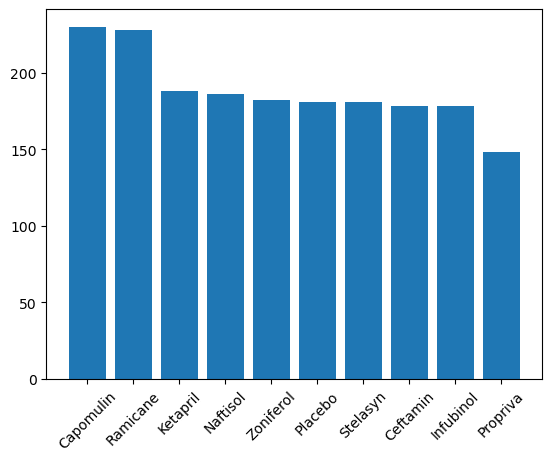

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
summary_stats.sort_values(by="count", ascending= False,inplace= True)
plt.bar(summary_stats.index, summary_stats["count"]	)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


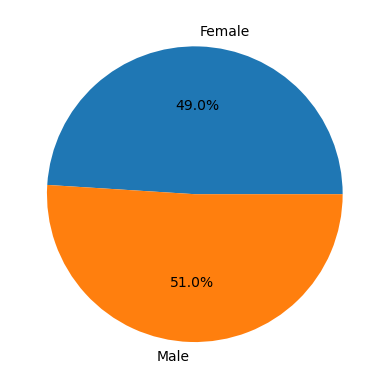

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Calculating the total number of observations
total_observations = len(mouse_study_clean_df)

# Grouping the DataFrame by 'Sex' and calculating the percentage of each sex
sex_percentage = (mouse_study_clean_df.groupby("Sex")["Mouse ID"].count() / total_observations * 100).round()

plt.pie(sex_percentage, autopct='%1.1f%%', labels=sex_percentage.index)
plt.show()

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Step 1: Get the last timepoint for each mouse
last_timepoint = mouse_study_clean_df.groupby('Mouse ID')['Timepoint'].max()

# Step 2: Create a DataFrame with the last timepoint for each mouse
last_timepoint_df = pd.DataFrame(last_timepoint)

# Step 3: Merge this DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint_df, mouse_study_clean_df, on=['Mouse ID', 'Timepoint'], how='left')

# Step 4: Filter for the four specific treatment regimens
target_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(target_treatments)]

# Display the final DataFrame
final_tumor_volume


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = {} 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset
    tumor_volume_data[treatment] = treatment_data
    
    # Calculate the quartiles and IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])    
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Calculate the lower and upper bounds for potential outliers
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    potential_outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
  
    # Print the results
    print(f"Results for {treatment}:")
    print(f"  Lower Quartile: {lower_quartile}")
    print(f"  Upper Quartile: {upper_quartile}")
    print(f"  Interquartile Range (IQR): {iqr}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Potential Outliers: {potential_outliers}\n")

# Print the dictionary containing tumor volume data for each treatment
print("Tumor Volume Data:")
print(tumor_volume_data)



quantiles:Capomulin
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
end
Results for Capomulin:
  Lower Quartile: 32.37735684
  Upper Quartile: 40.1592203
  Interquartile Range (IQR): 7.781863460000004
  Lower Bound: 20.70456164999999
  Upper Bound: 51.83201549
  Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

quantiles:Ramicane
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
end
Results for Ramicane:
  Lower Quartile: 31.56046955
  Upper Quartile: 40.65900627
  Interquartile Range (IQR): 9.098536719999998
  Lower Bound: 17.912664470000003
  Upper Bound: 54.30681135
  Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

quantiles:Infubinol
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
end
Results for Infubinol:
  Lower Quartile: 54.04860769
  Upper Quartile: 65.52574285
  Interquartile Range (IQR): 1

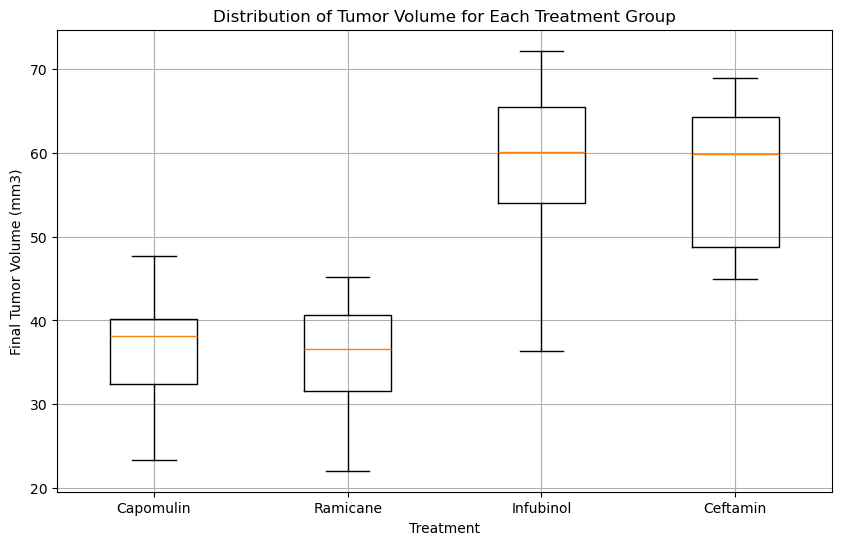

In [51]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list to store tumor volume data for each treatment
tumor_volume_data = [final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments]

# Plot the box plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=18))
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.grid(True)
plt.show()


In [45]:
mouse_study_clean_df[mouse_study_clean_df["Drug Regimen"] == 'Capomulin'].describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,230.000000,230.000000,230.000000,230.000000,230.000000
mean,13.456522,19.965217,21.565217,40.675741,0.713043
std,7.721423,2.732404,14.384994,4.994774,0.848993
min,1.000000,15.000000,0.000000,23.343598,0.000000
25%,7.000000,17.000000,10.000000,37.685933,0.000000
50%,16.500000,20.500000,20.000000,41.557809,0.000000
75%,20.000000,22.000000,35.000000,45.000000,1.000000
max,24.000000,25.000000,45.000000,48.158209,3.000000


## Line and Scatter Plots

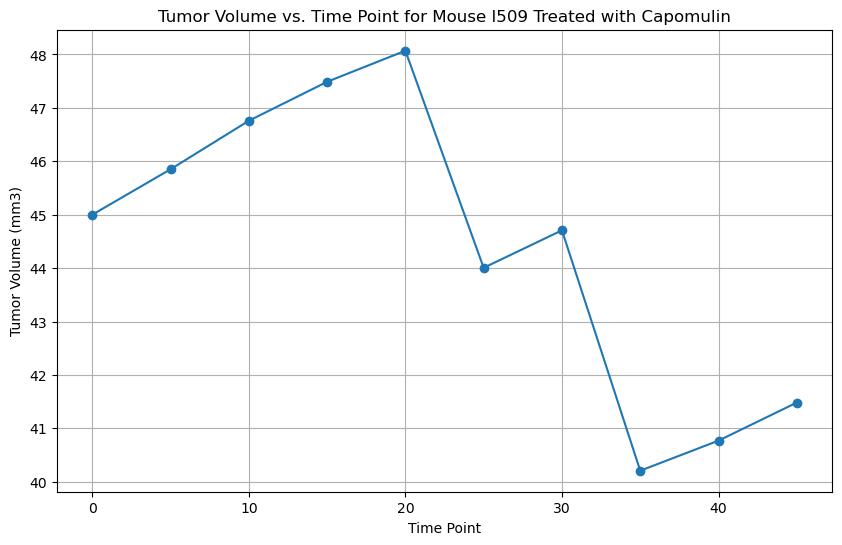

In [37]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Step 1: Filter the DataFrame for mice treated with Capomulin
capomulin_data = mouse_study_clean_df[mouse_study_clean_df['Drug Regimen'] == 'Capomulin']

# Step 2: Choose the mouse with ID "I509" from the filtered data
mouse_l509 = capomulin_data[capomulin_data['Mouse ID'] == 'l509']

# Step 3: Plot tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'], marker='o', linestyle='-')
plt.title('Tumor Volume vs. Time Point for Mouse l509 Treated with Capomulin')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()



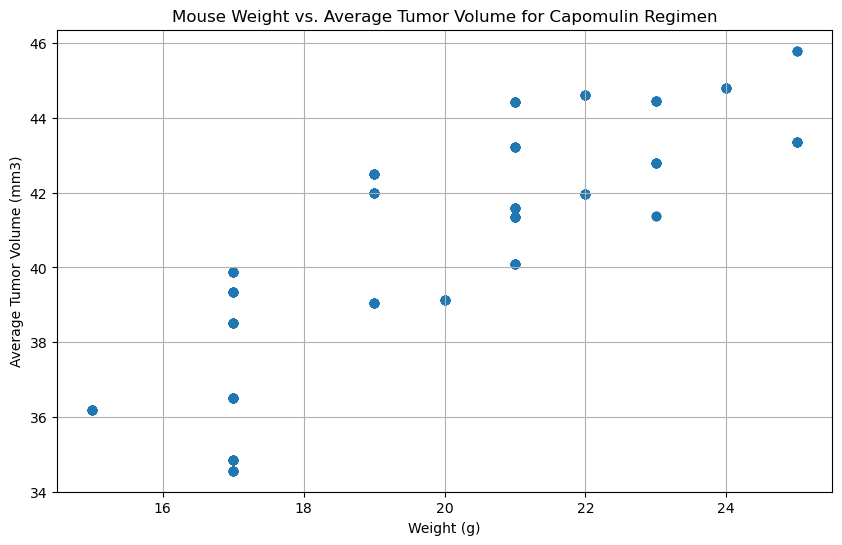

In [38]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt

# Step 1: Group the DataFrame by Mouse ID to calculate the average observed tumor volume for each mouse treated with Capomulin
capomulin_data = mouse_study_clean_df[mouse_study_clean_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Step 2: Calculate the average tumor volume for each mouse
average_tumor_volume = average_tumor_volume.reset_index()

# Step 3: Merge the average tumor volume data with the DataFrame containing information about mouse weight
merged_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left')

# Step 4: Plot the mouse weight against the average observed tumor volume using a scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()



## Correlation and Regression

Correlation Coefficient: 0.8343958614425967
Slope: 0.9609669432428362
Intercept: 21.48982721329954


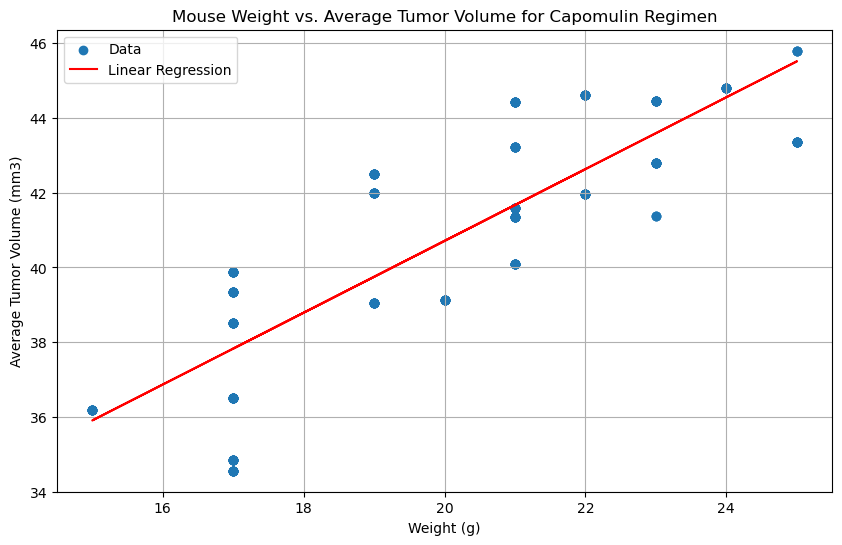

In [48]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import pearsonr, linregress

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Print slope and intercept
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Plot the linear regression line
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', label='Data')
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red', label='Linear Regression')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()
